In [1]:
from pathlib import Path
from utils import *
from single_multiple_efficientNet import *
from engine import *
from data_transforms import create_transform
from dataloaders import *

change_to_disk()
data_dir = Path("Quality/data/new_data/split_1k")
models_path = Path('Quality/Models_double/')
check_dir(models_path)

In [2]:
image_shape = (1080, 1920)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[0]), int(resize[1])]
BATCH_SIZE = 16

data_transform = create_transform(resize=resize, rotate=10, flip_h = True, color_dev=True, transf_tensor=True, normalize=True, sp_noise=True, gauss_noise=True)

train_dl, validation_dl, test_dl, train_data, validation_data, test_data = create_dataloaders_multilabel(data_dir, transform = data_transform, batch_size=BATCH_SIZE, num_workers= NUM_WORKERS)

In [3]:
NUM_EPOCHS = 100
lr = 0.001
device = get_device()

effnetb0 = EfficientNetB0()

loss_fn_binary = nn.BCELoss()
loss_fn_multiclass = nn.CrossEntropyLoss()

In [4]:
model_name = "EfficientNetB0"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train EfficientNet B0
effnetb0.to(device)
nadam_optim = torch.optim.NAdam(params=effnetb0.parameters(), lr=lr)
train_effnetb0_results, train_time_effnetb0 = train(effnetb0, train_dl, validation_dl, optimizer=nadam_optim, loss_fn_binary=loss_fn_binary, loss_fn_multiclass=loss_fn_multiclass, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

Quality\Models_double\EfficientNetB0 does not exist, creating one...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3943 | train_acc: 0.7998 | validation_loss: 0.3467 | validation_acc: 0.8566
Epoch: 2 | train_loss: 0.8254 | train_acc: 0.8902 | validation_loss: 0.2573 | validation_acc: 0.8963
Epoch: 3 | train_loss: 0.5545 | train_acc: 0.9327 | validation_loss: 0.2524 | validation_acc: 0.9115
Epoch: 4 | train_loss: 0.3834 | train_acc: 0.9533 | validation_loss: 0.2092 | validation_acc: 0.9212
Epoch: 5 | train_loss: 0.2959 | train_acc: 0.9648 | validation_loss: 0.2101 | validation_acc: 0.9232
Epoch: 6 | train_loss: 0.2486 | train_acc: 0.9712 | validation_loss: 0.2076 | validation_acc: 0.9290
Epoch: 7 | train_loss: 0.2104 | train_acc: 0.9743 | validation_loss: 0.2788 | validation_acc: 0.9251
Epoch: 8 | train_loss: 0.1963 | train_acc: 0.9777 | validation_loss: 0.2248 | validation_acc: 0.9277
Epoch: 9 | train_loss: 0.1756 | train_acc: 0.9782 | validation_loss: 0.2571 | validation_acc: 0.9147
Epoch: 10 | train_loss: 0.1674 | train_acc: 0.9799 | validation_loss: 0.2124 | validation_a

In [5]:
eval_effnetb0_results = 0
effnetb0_results = [train_effnetb0_results, train_time_effnetb0, eval_effnetb0_results]
final_save(model_folder_path, model_name, NUM_EPOCHS, effnetb0, effnetb0_results)

In [4]:
model_name = "EfficientNetB0"
model = EfficientNetB0
effnetb0_results, final_effnetb0_model, best_effnetb0_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 42, device)
print("Done")

Done


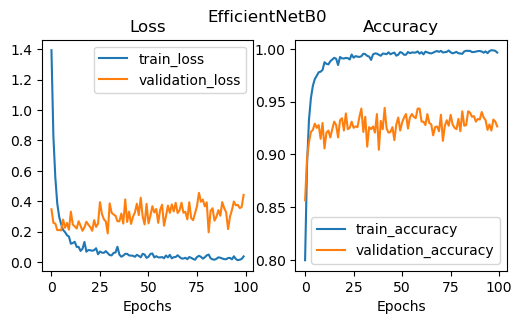

In [6]:
plot_loss_curves(effnetb0_results[0], "EfficientNetB0")